# Part 2: Time Series Aanalysis

# [Loading required packages]

In [1]:
#Loading required packages
import json
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from datetime import datetime

# [Loading and filtering data as per requirement]

In [2]:
#Loading Data for year 2018

#Year 2018
url1 = 'https://data.cityofnewyork.us/resource/w7fs-fd9i.json?$where=mta_tax=0&trip_type=1&$limit=30000'
dataf1 = pd.read_json(url1, orient = 'columns')

#Separating Months 
dataf1['month'] = pd.DatetimeIndex(dataf1['lpep_dropoff_datetime']).month
#dataf1['month']

#Datetime format
dataf1['lpep_dropoff_datetime'] = pd.to_datetime(dataf1['lpep_dropoff_datetime'])
dataf1['lpep_pickup_datetime'] = pd.to_datetime(dataf1['lpep_pickup_datetime'])

#YYYY:MM:DD HH:MM:SS format
dataf1['time_stamp'] = pd.DatetimeIndex(dataf1['lpep_dropoff_datetime'])  
dataf1['pi_time_stamp'] = pd.DatetimeIndex(dataf1['lpep_pickup_datetime'])
#dataf1['pi_time_stamp']
#dataf1['time_stamp']

#To know the weekday 
dataf1['weekday'] = dataf1['time_stamp'].dt.weekday_name
#dataf1['weekday']

#To check date
#dataf1['date'] = dataf1['time_stamp'].dt.date

In [3]:
#For year 2017

url2 = 'https://data.cityofnewyork.us/resource/5gj9-2kzx.json?$where=mta_tax=0&trip_type=1&$limit=30000'
dataf2 = pd.read_json(url2, orient = 'columns')
#len17 = len(dataf2)

dataf2['month'] = pd.DatetimeIndex(dataf2['lpep_dropoff_datetime']).month
dataf2['lpep_dropoff_datetime'] = pd.to_datetime(dataf2['lpep_dropoff_datetime'])
dataf2['lpep_pickup_datetime'] = pd.to_datetime(dataf2['lpep_pickup_datetime'])

dataf2['stamp'] = pd.DatetimeIndex(dataf2['lpep_dropoff_datetime'])
dataf2['weekday'] = dataf2['stamp'].dt.weekday_name

In [4]:
#For year 2016
#Year 2016

url3 = 'https://data.cityofnewyork.us/resource/pqfs-mqru.json?$where=mta_tax=0&trip_type=1&$limit=30000'
dataf3 = pd.read_json(url3, orient = 'columns')

dataf3['month'] = pd.DatetimeIndex(dataf3['lpep_dropoff_datetime']).month
dataf3['lpep_dropoff_datetime'] = pd.to_datetime(dataf3['lpep_dropoff_datetime'])
dataf3['lpep_pickup_datetime'] = pd.to_datetime(dataf3['lpep_pickup_datetime'])

dataf3['trip_time'] = dataf3['lpep_dropoff_datetime'] - dataf3['lpep_pickup_datetime']
dataf3['diff_time'] = dataf3['trip_time'] / np.timedelta64(1,'m')

# [To know in which months people use taxi more]

In [5]:
#Creating function for separating months

#Number of months
m = [1,2,3,4,5,6,7,8,9,10,11,12] 

#Function
def month_len(data,x):
    for i in m:
        data_i = data[['month']][data['month'] == i]
        d_data = len(data_i)
        x.append(d_data)

In [6]:
#Creating empty lists for  each years

#2018
d_18 = []

#2017
d_17 = []

#2016
d_16 = []

In [7]:
#Getting data for each years

#Year 2018
month_len(dataf1,d_18)

#Year 2017
month_len(dataf2,d_17)

#Year 2016
month_len(dataf3,d_16)

In [8]:
#Converting to percentage

#Year 2018
d_18_p = [l * (100/len(dataf1)) for l in d_18]
#d_18_p

#Year 2017
d_17_p = [m * (100/len(dataf2)) for m in d_17]
#d_17_p

#Year 2016
d_16_p = [n * (100/len(dataf3)) for n in d_16]
#d_16_p

C:\Users\forum\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


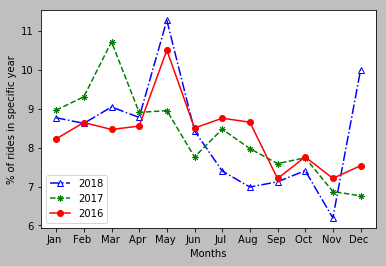

In [9]:
#Line chart for results
with plt.style.context ('grayscale'):
    fig = plt.figure()
    fig.show()
    ax = fig.add_subplot(111)
    x = [1,2,3,4,5,6,7,8,9,10,11,12]
    ax.plot(x, d_18_p, c = 'b', marker = "^", ls = '-.', label = '2018', fillstyle = 'none')
    ax.plot(x, d_17_p, c = 'g', marker = (8,2,0), ls = '--', label = '2017')
    ax.plot(x, d_16_p, c = 'r', marker = "o", ls = '-', label = '2016')
    plt.legend(loc = 3)
    months = ['Jan ', 'Feb ', 'Mar ', 'Apr ', 'May ', 'Jun ', 'Jul ', 'Aug ', 'Sep ', 'Oct ', 'Nov ', 'Dec ']
    plt. xticks(x, months )
    plt.xlabel('Months')
    plt.ylabel('% of rides in specific year')

#March April May are rainy months in NY as per google search
#It is observed thatRainy month has higher rates (trip time is a reason too)
#http://www.weathergamut.com/2019/01/01/december-2018-ninth-wettest-on-record-for-nyc/
#https://www.timeanddate.com/weather/usa/new-york/historic?month=12&year=2018

# [To know if there is any difference in fare amount for each days of the week]

In [10]:
#Creating function for separating days

#Number of days
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = []

#Function
def day_len(data,y):
    for j in weekdays:
        df_j = data[['trip_distance', 'fare_amount']][data['weekday'] == j]
        c_j = df_j['fare_amount'].sum() / df_j['trip_distance'].sum()
        y.append(c_j)

In [11]:
#Filtering data for year 2018 and year 2017

#Year 2018
datac1 = dataf1[(dataf1['fare_amount']>5) & (dataf1['fare_amount']<15)]
df_charge = datac1[['fare_amount','trip_distance','weekday']][(datac1['trip_distance']<2) & (datac1['trip_distance']>0)]

#Year 2017
datac2 = dataf2[(dataf2['fare_amount']>5) & (dataf2['fare_amount']<15)]
df2_charge = datac2[['fare_amount','trip_distance','weekday']][(datac2['trip_distance']<2) & (datac2['trip_distance']>0)]

In [12]:
#Creating empty list for years

#Year 2018
c_18 = []

#Year 2017
c_17 = []

In [13]:
#Getting values

#Year 2018
day_len(df_charge,c_18)
#c_18

#Year 2017
day_len(df2_charge,c_17)
c_17

[7.07959449277348,
 6.883890577507599,
 6.550911640953718,
 6.982996241274387,
 6.728627224070592,
 7.632107023411372,
 7.39015190131512]

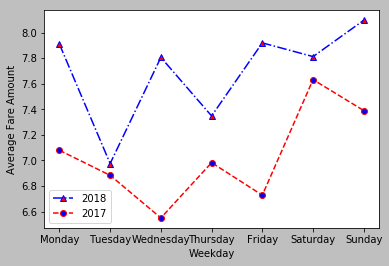

In [14]:
#Line chart for the results
d = [1,2,3,4,5,6,7]
with plt.style.context ('grayscale'):
    plt.plot(d, c_18, c = 'b', marker = "^", markerfacecolor = 'red', ls = '-.', label = "2018")
    plt.plot(d, c_17, marker = 'o', ls = '--', markerfacecolor = 'blue', color = 'red', label = "2017")
    plt.xlabel('Weekday')
    plt.ylabel('Average Fare Amount')
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.xticks(d, weekdays)
    plt.legend()

# [To know the peak of time stamps of each pickups and drop-offs for short distance trips and long distance trips]

In [15]:
#Radar Chart for Pick up Short Distance
#For Pickups
df_pi_short = dataf1[['pi_time_stamp','trip_distance','fare_amount']][(dataf1['trip_distance']>0) & (dataf1['trip_distance'] < 30)]

#Filtering data
pi_short_01 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('00:00:00','01:00:00')]
pi_short_02 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('01:00:00','02:00:00')]
pi_short_03 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('02:00:00','03:00:00')]
pi_short_04 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('03:00:00','04:00:00')]
pi_short_05 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('04:00:00','05:00:00')]
pi_short_06 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('05:00:00','06:00:00')]
pi_short_07 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('06:00:00','07:00:00')]
pi_short_08 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('07:00:00','08:00:00')]
pi_short_09 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('08:00:00','09:00:00')]
pi_short_010 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('09:00:00','10:00:00')]
pi_short_011 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('10:00:00','11:00:00')]
pi_short_012 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('11:00:00','12:00:00')]
pi_short_1 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('12:00:00','13:00:00')]
pi_short_2 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('13:00:00','14:00:00')]
pi_short_3 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('14:00:00','15:00:00')]
pi_short_4 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('15:00:00','16:00:00')]
pi_short_5 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('16:00:00','17:00:00')]
pi_short_6 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('17:00:00','18:00:00')]
pi_short_7 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('18:00:00','19:00:00')]
pi_short_8 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('19:00:00','20:00:00')]
pi_short_9 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('20:00:00','21:00:00')]
pi_short_10 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('21:00:00','22:00:00')]
pi_short_11 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('22:00:00','23:00:00')]
pi_short_12 = df_pi_short['pi_time_stamp'][df_pi_short['pi_time_stamp'].dt.strftime('%H:%M:%S').between('23:00:00','00:00:00')]

#Making list
pi_sh_data = [len(pi_short_07),len(pi_short_06),len(pi_short_05),len(pi_short_04),len(pi_short_03),len(pi_short_02),len(pi_short_01),len(pi_short_12),len(pi_short_11),len(pi_short_10),len(pi_short_9),len(pi_short_8),len(pi_short_7),len(pi_short_6),len(pi_short_5),len(pi_short_4),len(pi_short_3),len(pi_short_2),len(pi_short_1),len(pi_short_012),len(pi_short_011),len(pi_short_010),len(pi_short_09),len(pi_short_08)]

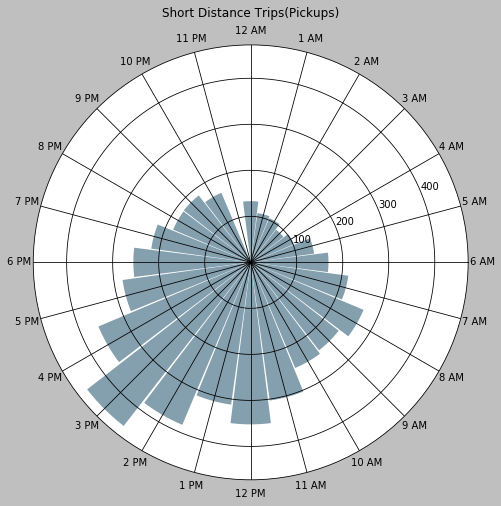

In [16]:
#Radar Chart
with plt.style.context ('grayscale'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,polar = True)
    N = len(pi_sh_data) 
    theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
    time = ['6 AM','5 AM','4 AM','3 AM','2 AM','1 AM','12 AM','11 PM','10 PM','9 PM','8 PM','7 PM', '6 PM','5 PM','4 PM','3 PM','2 PM','1 PM', '12 PM','11 AM', '10 AM','9 AM', '8 AM','7 AM' ]
    bars = ax.bar(theta, pi_sh_data, width = 0.25, align = "center",color = '#849FAD')
    ax.set_xticks(theta)
    ax.set_xticklabels(time)
    ax.yaxis.grid(True)
    plt.title('Short Distance Trips(Pickups)')
    plt.show()

In [17]:
#Radar Chart for Pick up long Distance
#For Pickups
df_pi_long = dataf1[['pi_time_stamp','trip_distance','fare_amount']][(dataf1['trip_distance'] >= 30)]

#Filtering data
pi_long_01 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('00:00:00','01:00:00')]
pi_long_02 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('01:00:00','02:00:00')]
pi_long_03 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('02:00:00','03:00:00')]
pi_long_04 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('03:00:00','04:00:00')]
pi_long_05 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('04:00:00','05:00:00')]
pi_long_06 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('05:00:00','06:00:00')]
pi_long_07 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('06:00:00','07:00:00')]
pi_long_08 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('07:00:00','08:00:00')]
pi_long_09 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('08:00:00','09:00:00')]
pi_long_010 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('09:00:00','10:00:00')]
pi_long_011 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('10:00:00','11:00:00')]
pi_long_012 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('11:00:00','12:00:00')]
pi_long_1 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('12:00:00','13:00:00')]
pi_long_2 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('13:00:00','14:00:00')]
pi_long_3 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('14:00:00','15:00:00')]
pi_long_4 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('15:00:00','16:00:00')]
pi_long_5 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('16:00:00','17:00:00')]
pi_long_6 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('17:00:00','18:00:00')]
pi_long_7 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('18:00:00','19:00:00')]
pi_long_8 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('19:00:00','20:00:00')]
pi_long_9 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('20:00:00','21:00:00')]
pi_long_10 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('21:00:00','22:00:00')]
pi_long_11 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('22:00:00','23:00:00')]
pi_long_12 = df_pi_long['pi_time_stamp'][df_pi_long['pi_time_stamp'].dt.strftime('%H:%M:%S').between('23:00:00','00:00:00')]

#Making a list
pi_long_data = [len(pi_long_07),len(pi_long_06),len(pi_long_05),len(pi_long_04),len(pi_long_03),len(pi_long_02),len(pi_long_01),len(pi_long_12),len(pi_long_11),len(pi_long_10),len(pi_long_9),len(pi_long_8),len(pi_long_7),len(pi_long_6),len(pi_long_5),len(pi_long_4),len(pi_long_3),len(pi_long_2),len(pi_long_1),len(pi_long_012),len(pi_long_011),len(pi_long_010),len(pi_long_09),len(pi_long_08)]


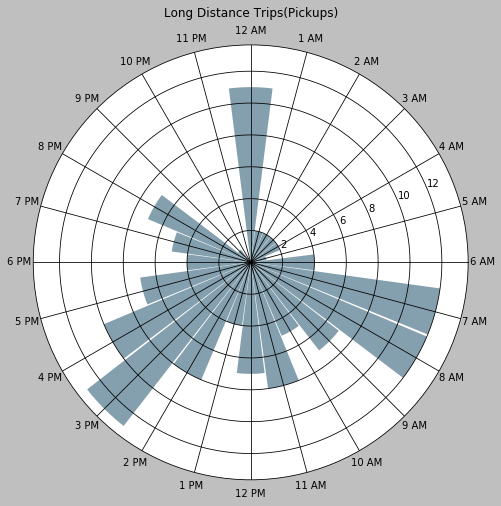

In [18]:
#Radar chart
with plt.style.context ('grayscale'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,polar = True)
    N = len(pi_long_data) 
    theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
    time = ['6 AM','5 AM','4 AM','3 AM','2 AM','1 AM','12 AM','11 PM','10 PM','9 PM','8 PM','7 PM', '6 PM','5 PM','4 PM','3 PM','2 PM','1 PM', '12 PM','11 AM', '10 AM','9 AM', '8 AM','7 AM' ]
    bars = ax.bar(theta, pi_long_data, width = 0.25, align = "center",color = '#849FAD')
    ax.set_xticks(theta)
    ax.set_xticklabels(time)
    ax.yaxis.grid(True)
    plt.title('Long Distance Trips(Pickups)')
    plt.show()

In [19]:
#Radar Chart for drop off Short Distance
#For dropoffs
df_short = dataf1[['passenger_count','time_stamp','trip_distance','fare_amount']][(dataf1['trip_distance']>0) & (dataf1['trip_distance']<30)]

#Filtering data
short_01 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('00:00:00','01:00:00')]
short_02 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('01:00:00','02:00:00')]
short_03 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('02:00:00','03:00:00')]
short_04 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('03:00:00','04:00:00')]
short_05 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('04:00:00','05:00:00')]
short_06 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('05:00:00','06:00:00')]
short_07 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('06:00:00','07:00:00')]
short_08 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('07:00:00','08:00:00')]
short_09 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('08:00:00','09:00:00')]
short_010 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('09:00:00','10:00:00')]
short_011 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('10:00:00','11:00:00')]
short_012 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('11:00:00','12:00:00')]
short_1 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('12:00:00','13:00:00')]
short_2 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('13:00:00','14:00:00')]
short_3 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('14:00:00','15:00:00')]
short_4 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('15:00:00','16:00:00')]
short_5 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('16:00:00','17:00:00')]
short_6 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('17:00:00','18:00:00')]
short_7 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('18:00:00','19:00:00')]
short_8 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('19:00:00','20:00:00')]
short_9 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('20:00:00','21:00:00')]
short_10 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('21:00:00','22:00:00')]
short_11 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('22:00:00','23:00:00')]
short_12 = df_short['time_stamp'][df_short['time_stamp'].dt.strftime('%H:%M:%S').between('23:00:00','00:00:00')]

#Making a list
sh_data = [len(short_07),len(short_06),len(short_05),len(short_04),len(short_03),len(short_02),len(short_01),len(short_12),len(short_11),len(short_10),len(short_9),len(short_8),len(short_7),len(short_6),len(short_5),len(short_4),len(short_3),len(short_2),len(short_1),len(short_012),len(short_011),len(short_010),len(short_09),len(short_08)]

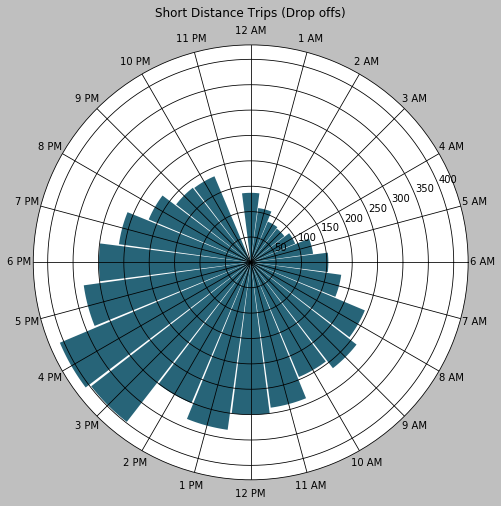

In [20]:
#Radar chart for short distance drop offs
with plt.style.context ('grayscale'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,polar = True)
    N = len(sh_data) 
    theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
    time = ['6 AM','5 AM','4 AM','3 AM','2 AM','1 AM','12 AM','11 PM','10 PM','9 PM','8 PM','7 PM', '6 PM','5 PM','4 PM','3 PM','2 PM','1 PM', '12 PM','11 AM', '10 AM','9 AM', '8 AM','7 AM' ]
    bars = ax.bar(theta, sh_data, width = 0.25, align = "center", color = '#276478')
    ax.set_xticks(theta)
    ax.set_xticklabels(time)
    ax.yaxis.grid(True)
    plt.title('Short Distance Trips (Drop offs)')
    plt.show()

In [21]:
#For long distance
#Dropoffs long distance
df_long = dataf1[['passenger_count','time_stamp','trip_distance','fare_amount']][(dataf1['trip_distance']>=30)]

#Filtering data
long_01 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('00:00:00','01:00:00')]
long_02 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('01:00:00','02:00:00')]
long_03 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('02:00:00','03:00:00')]
long_04 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('03:00:00','04:00:00')]
long_05 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('04:00:00','05:00:00')]
long_06 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('05:00:00','06:00:00')]
long_07 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('06:00:00','07:00:00')]
long_08 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('07:00:00','08:00:00')]
long_09 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('08:00:00','09:00:00')]
long_010 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('09:00:00','10:00:00')]
long_011 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('10:00:00','11:00:00')]
long_012 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('11:00:00','12:00:00')]
long_1 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('12:00:00','13:00:00')]
long_2 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('13:00:00','14:00:00')]
long_3 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('14:00:00','15:00:00')]
long_4 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('15:00:00','16:00:00')]
long_5 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('16:00:00','17:00:00')]
long_6 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('17:00:00','18:00:00')]
long_7 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('18:00:00','19:00:00')]
long_8 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('19:00:00','20:00:00')]
long_9 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('20:00:00','21:00:00')]
long_10 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('21:00:00','22:00:00')]
long_11 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('22:00:00','23:00:00')]
long_12 = df_long['time_stamp'][df_long['time_stamp'].dt.strftime('%H:%M:%S').between('23:00:00','00:00:00')]

#Making a list
long_data = [len(long_07),len(long_06),len(long_05),len(long_04),len(long_03),len(long_02),len(long_01),len(long_12),len(long_11),len(long_10),len(long_9),len(long_8),len(long_7),len(long_6),len(long_5),len(long_4),len(long_3),len(long_2),len(long_1),len(long_012),len(long_011),len(long_010),len(long_09),len(long_08)]


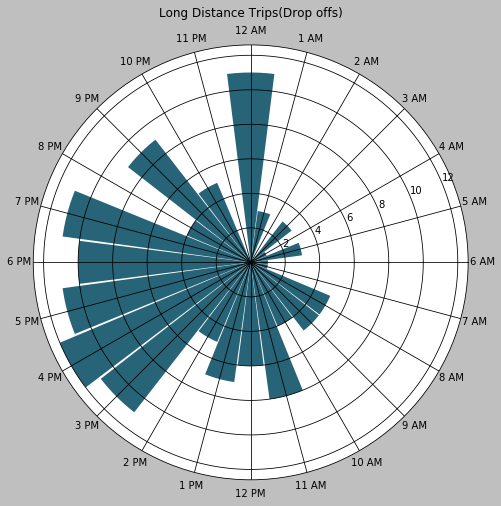

In [22]:
#Radar chart for long distance dropoffs
with plt.style.context ('grayscale'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,polar = True)
    N = len(sh_data) 
    theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
    time = ['6 AM','5 AM','4 AM','3 AM','2 AM','1 AM','12 AM','11 PM','10 PM','9 PM','8 PM','7 PM', '6 PM','5 PM','4 PM','3 PM','2 PM','1 PM', '12 PM','11 AM', '10 AM','9 AM', '8 AM','7 AM' ]
    bars = ax.bar(theta, long_data, width = 0.25, align = "center", color = '#276478')
    ax.set_xticks(theta)
    ax.set_xticklabels(time)
    ax.yaxis.grid(True)
    plt.title('Long Distance Trips(Drop offs)')
    plt.show()

# [Number of passengers for short distance trips and long distance trips]

In [23]:
#Checking passenger counts for short distance and long distance trips
#Filtering data for short distance and long distance trips
df_pass_sh = dataf1[['passenger_count','trip_distance']][(dataf1['trip_distance']>0) & (dataf1['trip_distance']<5)]
df_pass_lo = dataf1[['passenger_count','trip_distance']][(dataf1['trip_distance']>5)]

In [24]:
#For short distance trips
#For passenger 1 and passenger more than 1
pass_sh_1 = df_pass_sh['passenger_count'][df_pass_sh['passenger_count'] == 1]
pass_sh_2 = df_pass_sh['passenger_count'][df_pass_sh['passenger_count'] >= 2]

#Converting into percentage
per_sh_1 = len(pass_sh_1)*100/len(df_pass_sh) #84.74721508140532
per_sh_2 = len(pass_sh_2)*100/len(df_pass_sh) #14.481576692373608

In [25]:
#For long distance trips
#For passenger 1 and passenger more than 1
pass_lo_1 = df_pass_lo['passenger_count'][df_pass_lo['passenger_count'] == 1]
pass_lo_2 = df_pass_lo['passenger_count'][df_pass_lo['passenger_count'] >= 2]

#Converting to percentage
per_lo_1 = len(pass_lo_1)*100/len(df_pass_lo) #78.16128020081581
per_lo_2 = len(pass_lo_2)*100/len(df_pass_lo) #21.524945089425792

In [26]:
#Making lists
#For passenger count 1
count_1 = [per_sh_1,per_lo_1]
#For passenger count 2
count_2 = [per_sh_2,per_lo_2]

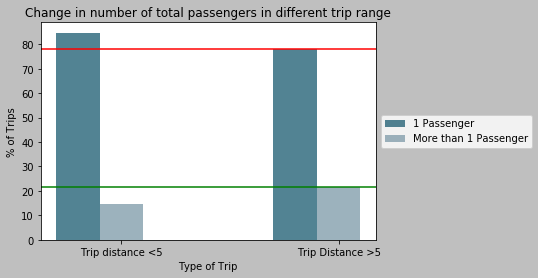

In [27]:
#Bar chart
with plt.style.context ('grayscale'):
    n_groups = 2
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.8
    reacts1 = plt.bar(index, count_1, bar_width, alpha = opacity, color = '#276478', label = '1 Passenger')
    reacts2 = plt.bar(index + bar_width, count_2, bar_width, alpha = opacity, color = '#849FAD', label = 'More than 1 Passenger')
    plt.xlabel('Type of Trip')
    plt.ylabel('% of Trips')
    plt.title('Change in number of total passengers in different trip range')
    plt.xticks(index + bar_width, ('Trip distance <5','Trip Distance >5'))
    plt.legend()   
    plt.axhline(y = per_lo_2, xmin = 0, xmax = 2, color = 'green')
    plt.axhline(y = per_lo_1, xmin = 0, xmax = 2, color = 'red')
    ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))